In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import datetime

In [3]:
def parser(x):
    return datetime.datetime.strptime('19'+x, '%Y-%m')

series =pd.read_csv('https://raw.githubusercontent.com/blue-yonder/pydse/master/pydse/data/sales-of-shampoo-over-a-three-ye.csv',sep=';', header=0, parse_dates=[0],index_col=0, squeeze=True,date_parser=parser)
series=pd.DataFrame(series,columns=['Sales'])

In [4]:
series.head()

,Sales
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3


In [5]:
series.dtypes

Sales    float64
dtype: object

In [6]:
series.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,36.0,312.6,148.937164,119.3,192.45,280.15,411.1,682.0


In [7]:
series.isnull().sum()

Sales    0
dtype: int64

(array([693961., 694081., 694204., 694326., 694446., 694569., 694691.,
        694811., 694934., 695056.]),
 <a list of 10 Text major ticklabel objects>)

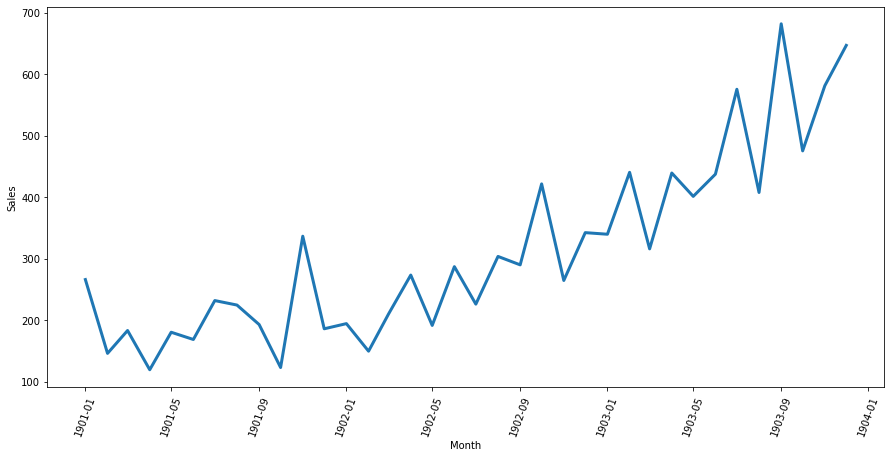

In [8]:
import seaborn as sns
fig=plt.figure(figsize=(15,7))
sns.lineplot(x=series.index , y=series.Sales,linewidth=3)
plt.xticks(rotation=70)

In [10]:
from statsmodels.tsa.stattools import adfuller , kpss
results=adfuller(series.Sales, regression='ctt')
print("ADF Test")
print(f"Test Statistic = {results[0]}")
print(f"P-Value = {results[1]}")

result=kpss(series.Sales,regression='ct')
print("\nKPSS Test")
print(f"Test Statistic = {results[0]}")
print(f"P-Value = {results[1]}")

ADF Test
Test Statistic = -4.244858733944584
P-Value = 0.015095224576492592

KPSS Test
Test Statistic = -4.244858733944584
P-Value = 0.015095224576492592


aaaa


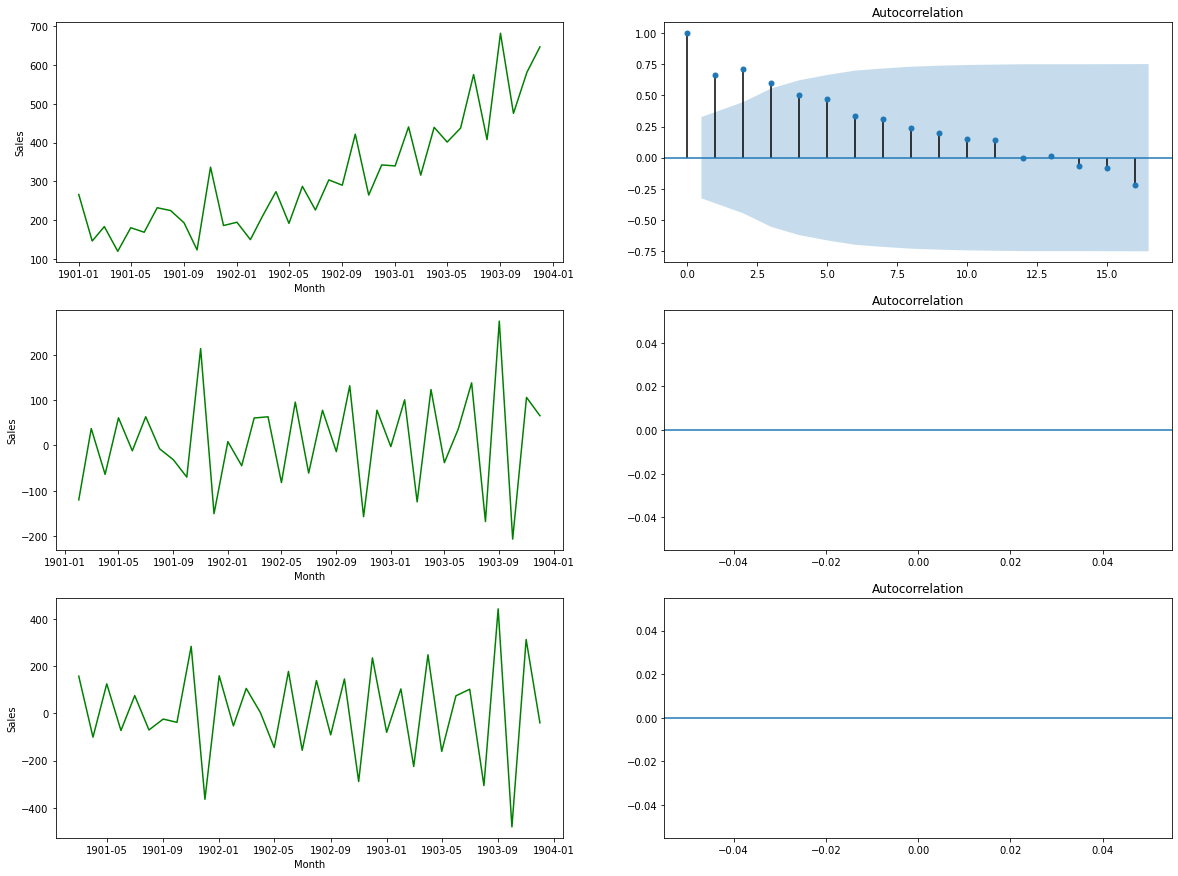

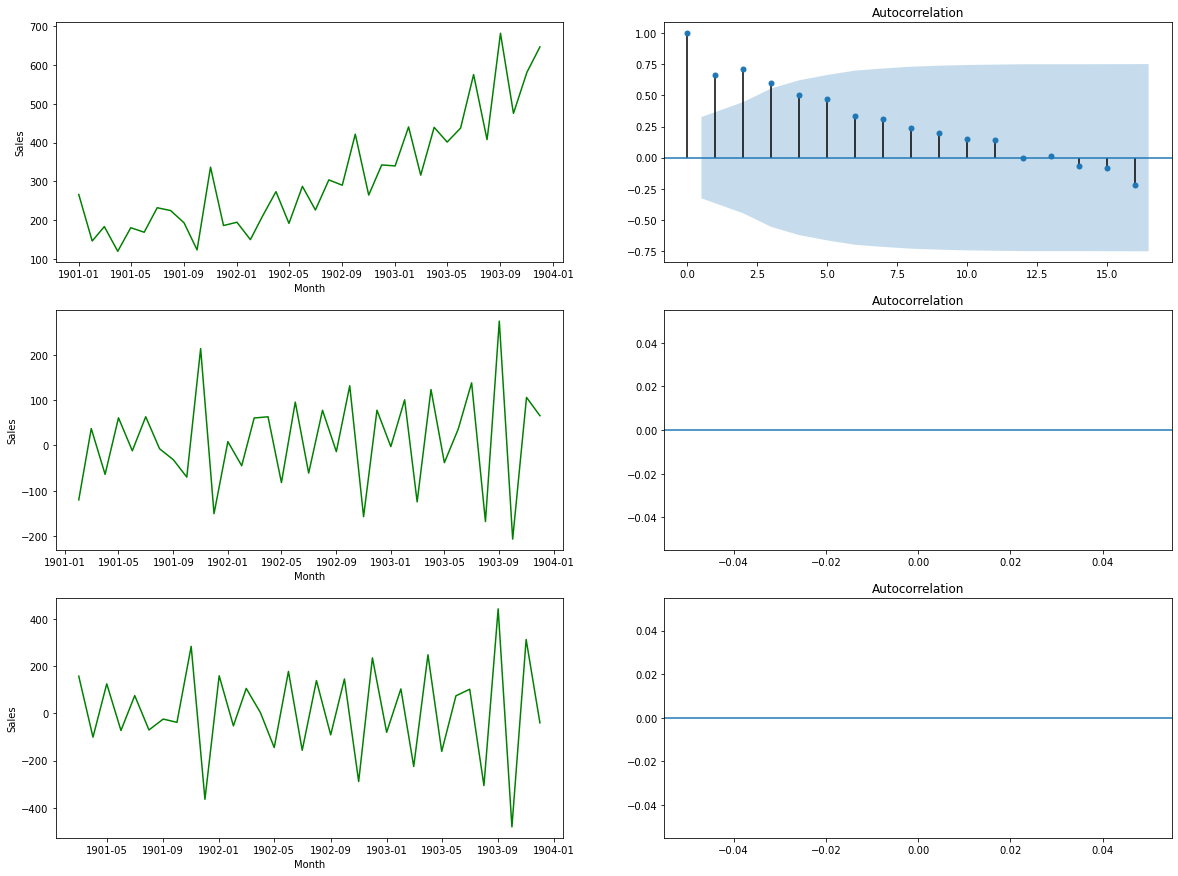

In [12]:
from statsmodels.graphics.tsaplots import plot_pacf , plot_acf
import seaborn as sns
fig,ax=plt.subplots(3,2,figsize=(20,15))

sns.lineplot(x=series.index,y=series.Sales,ax=ax[0,0],color='g')
plot_acf(series.Sales,ax=ax[0,1])

sns.lineplot(x=series.index,y=series.Sales.diff(),ax=ax[1,0],color='g')
plot_acf(series.Sales.diff(),ax=ax[1,1])

sns.lineplot(x=series.index,y=series.Sales.diff().diff(),ax=ax[2,0],color='g')
plot_acf(series.diff().diff(),ax=ax[2,1])

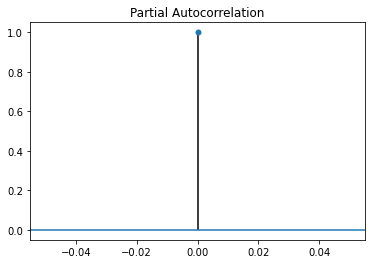

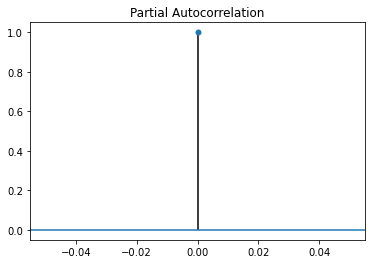

In [13]:
plot_pacf(series.Sales.diff())

In [214]:
train_end=datetime.date(1902,12,1)
test_end=datetime.date(1903,12,1)
train_data=series.loc[:train_end]
test_data=series.loc[train_end+datetime.timedelta(days=30):test_end]

model_1=ARIMA(train_data,order=(1,1,1)).fit()
pred=model_1.forecast(steps=len(test_data))[0]
print(f"MSE : {mean_squared_error(pred,test_data)}")
pd.DataFrame(data={"predictions":pred ,"True Values":test_data.Sales,"Residuals":pred-test_data.Sales})


MSE : 26205.81627975969


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


,predictions,True Values,Residuals
Month,,,
1903-01-01,301.813944,339.7,-37.886056
1903-02-01,320.080724,440.4,-120.319276
1903-03-01,323.943448,315.9,8.043448
1903-04-01,331.337522,439.3,-107.962478
1903-05-01,337.865837,401.3,-63.434163
1903-06-01,344.606405,437.4,-92.793595
1903-07-01,351.294937,575.5,-224.205063
1903-08-01,357.996226,407.6,-49.603774
1903-09-01,364.694387,682.0,-317.305613


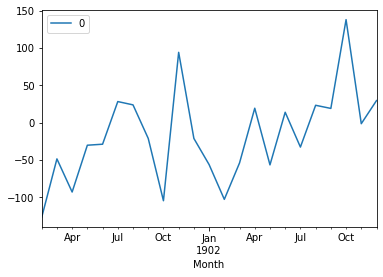

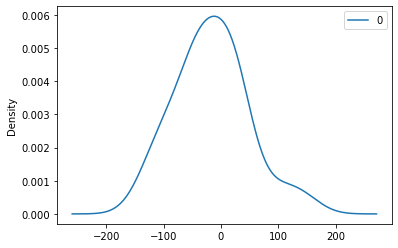

In [215]:
residuals=pd.DataFrame(model_1.resid)
residuals.plot()
residuals.plot(kind='kde')

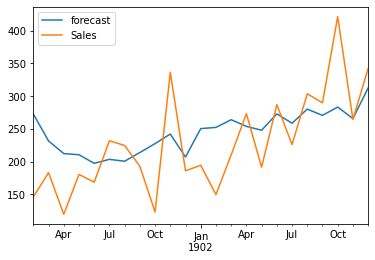

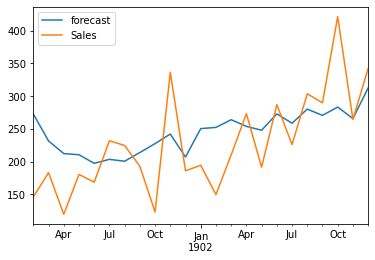

In [217]:
model_1.plot_predict(dynamic=False)

In [216]:
series.index

DatetimeIndex(['1901-01-01', '1901-02-01', '1901-03-01', '1901-04-01',
               '1901-05-01', '1901-06-01', '1901-07-01', '1901-08-01',
               '1901-09-01', '1901-10-01', '1901-11-01', '1901-12-01',
               '1902-01-01', '1902-02-01', '1902-03-01', '1902-04-01',
               '1902-05-01', '1902-06-01', '1902-07-01', '1902-08-01',
               '1902-09-01', '1902-10-01', '1902-11-01', '1902-12-01',
               '1903-01-01', '1903-02-01', '1903-03-01', '1903-04-01',
               '1903-05-01', '1903-06-01', '1903-07-01', '1903-08-01',
               '1903-09-01', '1903-10-01', '1903-11-01', '1903-12-01'],
              dtype='datetime64[ns]', name='Month', freq=None)

In [208]:
train_end=datetime.date(1902,12,1)
test_end=datetime.date(1903,12,1)
train_data=series.loc[:train_end]
test_data=series.loc[train_end+datetime.timedelta(days=30):test_end]

model_2=ARIMA(train_data,order=(1,2,1)).fit()
#pred=model_2.predict(start=test_data.index[0],end=test_data.index[-1])
#need for inverting if we used above method
pred=model_2.forecast(steps=len(test_data))[0]
print(f"RMSE : {mean_squared_error(pred,test_data)}")
pd.DataFrame(data={"predictions":pred ,"True Values":test_data.Sales,"Residuals":pred-test_data.Sales})


RMSE : 5734.668788543062


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


,predictions,True Values,Residuals
Month,,,
1903-01-01,318.593056,339.7,-21.106944
1903-02-01,363.755795,440.4,-76.644205
1903-03-01,364.870410,315.9,48.970410
1903-04-01,396.773640,439.3,-42.526360
1903-05-01,409.867130,401.3,8.567130
1903-06-01,437.022391,437.4,-0.377609
1903-07-01,456.453696,575.5,-119.046304
1903-08-01,482.599626,407.6,74.999626
1903-09-01,505.890950,682.0,-176.109050


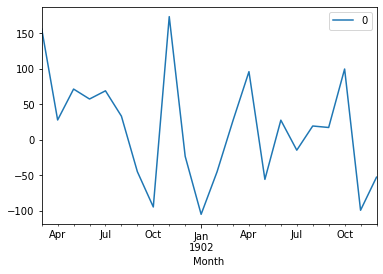

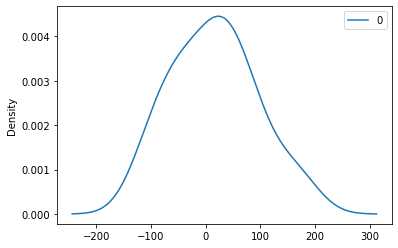

In [209]:
residuals=pd.DataFrame(model_2.resid)
residuals.plot()
residuals.plot(kind='kde')

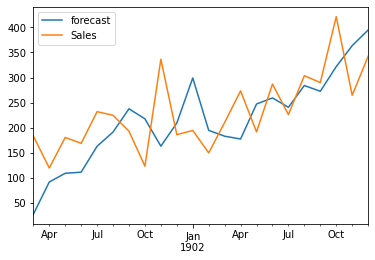

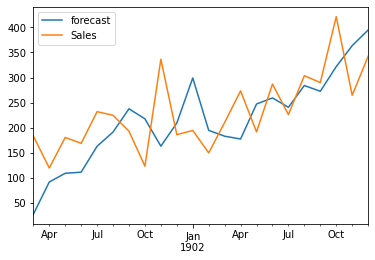

In [210]:
model_2.plot_predict(dynamic=False)

In [218]:
import pmdarima as pm
model=pm.auto_arima(series.Sales,start_p=0,start_q=0,test='adf',max_p=3,max_q=3,seasonal=False)
model.order

(1, 1, 2)

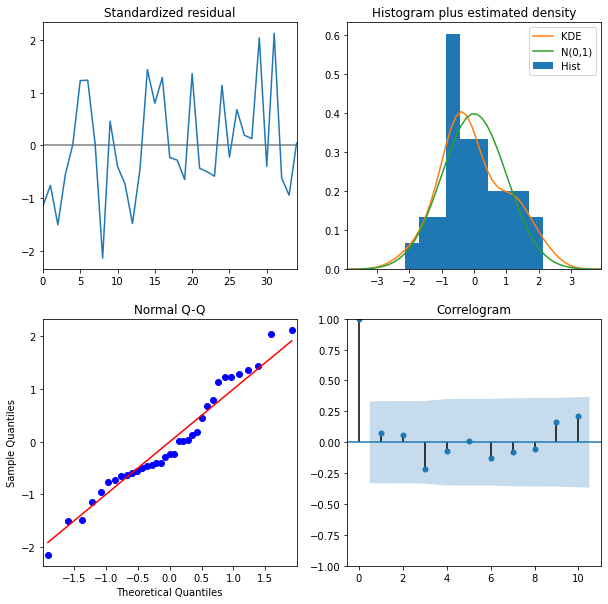

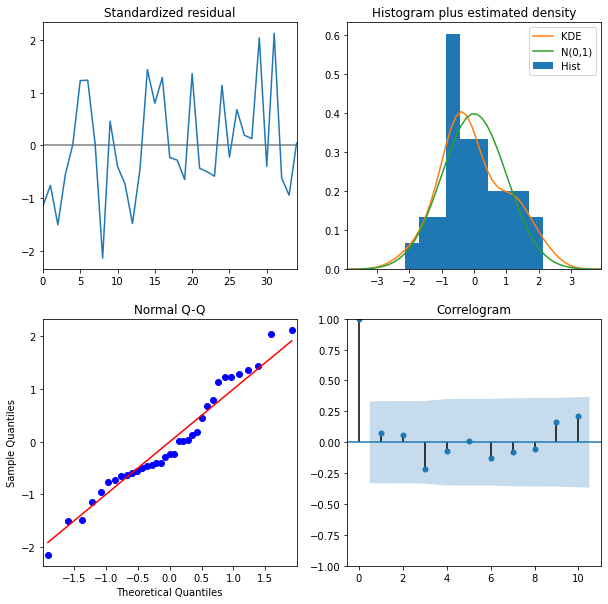

In [222]:
model.plot_diagnostics(figsize=(10,10))